In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib inline


In [3]:
figure_path = "/home/simon/eth/asl-fall17-project/report/Data/33/"
data_path = "/home/simon/eth/asl-fall17-project/experiment-scripts/3_Baseline_w_MW/33_extra/logs/"

# Configurations
# 1 client VM
# CT=2
wt = [8, 16, 32, 64] 
vc = [1, 4, 8, 16, 24, 32, 40]

In [4]:
mw1_gets_tp = {}
mw1_gets_rt = {}
mw1_sets_tp = {}
mw1_sets_rt = {}
mw2_gets_tp = {}
mw2_gets_rt = {}
mw2_sets_tp = {}
mw2_sets_rt = {}
min_get_rt = 10000
min_set_rt = 10000
min_get_st = 10000
min_set_st = 10000

for threads in wt:
    for clients in vc:
        # GETS
        path = data_path+"/wt"+str(threads)+"/VC_"+str(clients)+"/GETS/"
        for directory, subdirectory, files in os.walk(path):
            if(subdirectory == ['MW2', 'MW1']):
                # MW1
                for directory, subdirectory, files in os.walk(path+"MW1/"):
                    if(len(files) ==4 ):
                        # We're in a MW folder
                        table = pd.read_csv(directory+"/MeasurementTable.csv",index_col=False)
                        rt_histogram = pd.read_csv(directory+"/ResponseTimeHistogram.csv")
                        throughput = np.sum(table['get'][1:])/np.max(table['time'])/threads
                        resptime = 0
                        total_count = 0
                        
                        min_get_st = np.minimum(min_get_st, np.min(table['avgGetServiceTime']))

                        for row in range(rt_histogram.shape[0]):
                            total_count += rt_histogram.iloc[row,:]['requestcount']
                            resptime += rt_histogram.iloc[row,:]['requestcount']*rt_histogram.iloc[row,:]['time'] 
                            if threads==64:
                                if clients==32:
                                    if(rt_histogram.iloc[row,:]['requestcount'] > 0):
                                        min_get_rt = np.minimum(min_get_rt,rt_histogram.iloc[row,:]['time'])
                        # Convert to ms from microseconds
                        resptime = resptime/total_count/1000.0

                        key = str("wt"+str(threads)+"vc"+str(clients))
                        if key not in mw1_gets_tp:
                            mw1_gets_tp[key] = []
                            mw1_gets_rt[key] = []

                        mw1_gets_tp[key].append(throughput)
                        mw1_gets_rt[key].append(resptime)
                        
                
                # MW2
                for directory, subdirectory, files in os.walk(path+"MW2/"):
                    if(len(files) ==4 ):
                        # We're in a MW folder
                        table = pd.read_csv(directory+"/MeasurementTable.csv",index_col=False)
                        rt_histogram = pd.read_csv(directory+"/ResponseTimeHistogram.csv")
                        throughput = np.sum(table['get'][1:])/np.max(table['time'])/threads
                        resptime = 0
                        total_count = 0
                        
                        min_get_st = np.minimum(min_get_st, np.min(table['avgGetServiceTime']))

                        for row in range(rt_histogram.shape[0]):
                            total_count += rt_histogram.iloc[row,:]['requestcount']
                            resptime += rt_histogram.iloc[row,:]['requestcount']*rt_histogram.iloc[row,:]['time']
                            if threads==64:
                                if clients==32:
                                    if(rt_histogram.iloc[row,:]['requestcount'] > 0):
                                        min_get_rt = np.minimum(min_get_rt,rt_histogram.iloc[row,:]['time'])
                        # Convert to ms from microseconds
                        resptime = resptime/total_count/1000.0

                        key = str("wt"+str(threads)+"vc"+str(clients))
                        if key not in mw2_gets_tp:
                            mw2_gets_tp[key] = []
                            mw2_gets_rt[key] = []

                        mw2_gets_tp[key].append(throughput)
                        mw2_gets_rt[key].append(resptime)

                
        # SETS
        path = data_path+"/wt"+str(threads)+"/VC_"+str(clients)+"/SETS/"
        for directory, subdirectory, files in os.walk(path):
            if(subdirectory == ['MW2', 'MW1']):
                # MW1
                for directory, subdirectory, files in os.walk(path+"MW1/"):
                    if(len(files) == 4 ):
                        # We're in a MW folder
                        table = pd.read_csv(directory+"/MeasurementTable.csv",index_col=False)
                        rt_histogram = pd.read_csv(directory+"/ResponseTimeHistogram.csv")
                        throughput = np.sum(table['set'][1:])/np.max(table['time'])/threads
                        resptime = 0
                        total_count = 0
                        
                        min_set_st = np.minimum(min_set_st, np.min(table['avgSetServiceTime']))

                        for row in range(rt_histogram.shape[0]):
                            total_count += rt_histogram.iloc[row,:]['requestcount']
                            resptime += rt_histogram.iloc[row,:]['requestcount']*rt_histogram.iloc[row,:]['time']
                            if threads==64:
                                if clients==32:
                                    if(rt_histogram.iloc[row,:]['requestcount'] > 0):
                                        min_set_rt = np.minimum(min_set_rt,rt_histogram.iloc[row,:]['time'])
                        # Convert to ms from microseconds
                        resptime = resptime/total_count/1000.0

                        key = str("wt"+str(threads)+"vc"+str(clients))
                        if key not in mw1_sets_tp:
                            mw1_sets_tp[key] = []
                            mw1_sets_rt[key] = []

                        mw1_sets_tp[key].append(throughput)
                        mw1_sets_rt[key].append(resptime)
                
                # MW2
                for directory, subdirectory, files in os.walk(path+"MW2/"):
                    if(len(files) ==4 ):
                        # We're in a MW folder
                        table = pd.read_csv(directory+"/MeasurementTable.csv",index_col=False)
                        rt_histogram = pd.read_csv(directory+"/ResponseTimeHistogram.csv")
                        throughput = np.sum(table['set'][1:])/np.max(table['time'])/threads
                        resptime = 0
                        total_count = 0

                        min_set_st = np.minimum(min_set_st, np.min(table['avgSetServiceTime']))

                        for row in range(rt_histogram.shape[0]):
                            total_count += rt_histogram.iloc[row,:]['requestcount']
                            resptime += rt_histogram.iloc[row,:]['requestcount']*rt_histogram.iloc[row,:]['time']
                            if threads==64:
                                if clients==32:
                                    if(rt_histogram.iloc[row,:]['requestcount'] > 0):
                                        min_set_rt = np.minimum(min_set_rt,rt_histogram.iloc[row,:]['time'])
                        # Convert to ms from microseconds
                        resptime = resptime/total_count/1000.0

                        key = str("wt"+str(threads)+"vc"+str(clients))
                        if key not in mw2_sets_tp:
                            mw2_sets_tp[key] = []
                            mw2_sets_rt[key] = []

                        mw2_sets_tp[key].append(throughput)
                        mw2_sets_rt[key].append(resptime)
        
        
        
# Gather Aggregates
#8, 16, 32, 64
get_mean_tp = []
get_stddev_tp = []
get_mean_rt = []
get_stddev_rt = []
set_mean_tp = []
set_stddev_tp = []
set_mean_rt = []
set_stddev_rt = []

for threads in wt:
    g_m_tp = []
    g_s_tp = []
    g_m_rt = []
    g_s_rt = []

    s_m_tp = []
    s_s_tp = []
    s_m_rt = []
    s_s_rt = []
    for clients in vc:
        key = str("wt"+str(threads)+"vc"+str(clients))
        
        # Handle incomplete repetitions
        if not len(mw1_gets_tp[key]) == len(mw2_gets_tp[key]):
            length = np.min([len(mw1_gets_tp[key]), len(mw2_gets_tp[key])])
            mw1_gets_tp[key] = mw1_gets_tp[key][:length-1]
            mw2_gets_tp[key] = mw2_gets_tp[key][:length-1]

        
        g_m_tp.append(np.mean(np.add(mw1_gets_tp[key],mw2_gets_tp[key])))
        g_s_tp.append(np.std(np.add(mw1_gets_tp[key],mw2_gets_tp[key])))
        g_m_rt.append(np.mean(mw1_gets_rt[key]+mw2_gets_rt[key]))
        g_s_rt.append(np.std(mw1_gets_rt[key]+mw2_gets_rt[key]))
        
        # Handle incomplete repetitions
        if not len(mw1_sets_tp[key]) == len(mw2_sets_tp[key]):
            length = np.min([len(mw1_sets_tp[key]), len(mw2_sets_tp[key])])
            mw1_sets_tp[key] = mw1_sets_tp[key][:length-1]
            mw2_sets_tp[key] = mw2_sets_tp[key][:length-1]
        
        s_m_tp.append(np.mean(np.add(mw1_sets_tp[key],mw2_sets_tp[key])))
        s_s_tp.append(np.std(np.add(mw1_sets_tp[key],mw2_sets_tp[key])))
        s_m_rt.append(np.mean(mw1_sets_rt[key]+mw2_sets_rt[key]))
        s_s_rt.append(np.std(mw1_sets_rt[key]+mw2_sets_rt[key]))
    
    get_mean_tp.append(g_m_tp)
    get_stddev_tp.append(g_s_tp)
    get_mean_rt.append(g_m_rt)
    get_stddev_rt.append(g_s_rt)
    set_mean_tp.append(s_m_tp)
    set_stddev_tp.append(s_s_tp)
    set_mean_rt.append(s_m_rt)
    set_stddev_rt.append(s_s_rt)

In [5]:
print(min_get_rt)
print(min_set_rt)
print(min_get_st)
print(min_set_st)

1800
1700
126
122


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  label: str 
  label1: str 
  label2: str 
  pad: float 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.

5818.37931551
10349.7621004
19.5211666667
13.0928333333
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  label: str 
  label1: str 
  label2: str 
  pad: float 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_

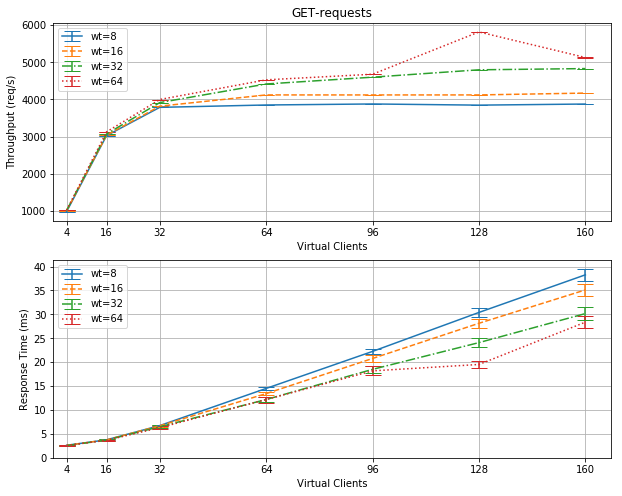

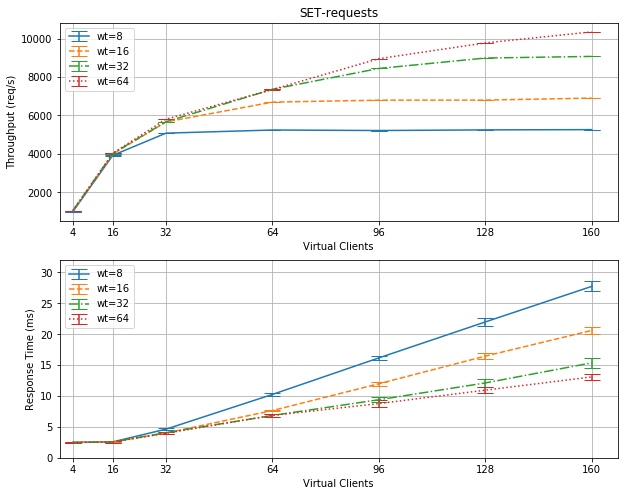

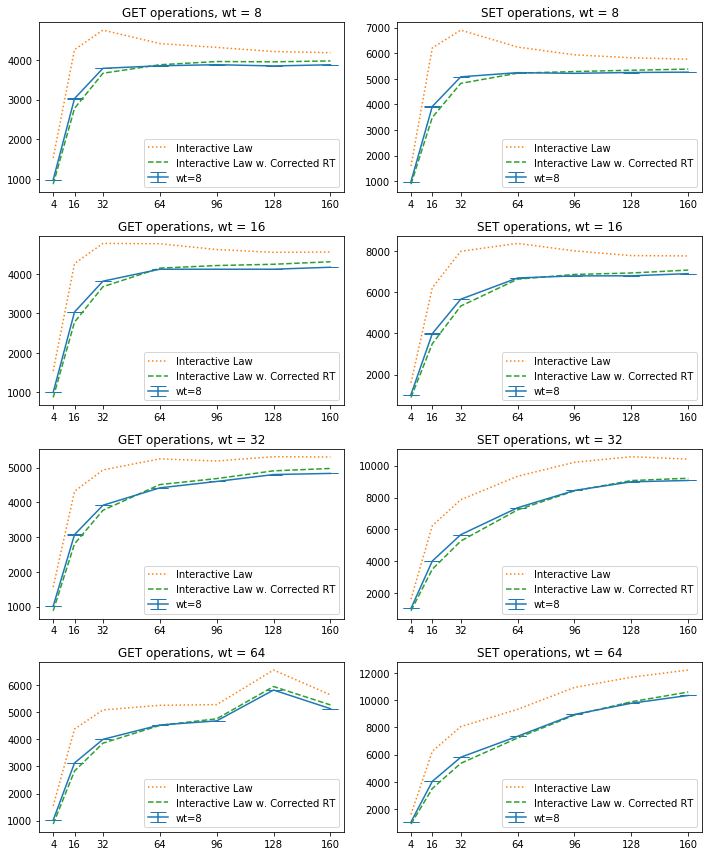

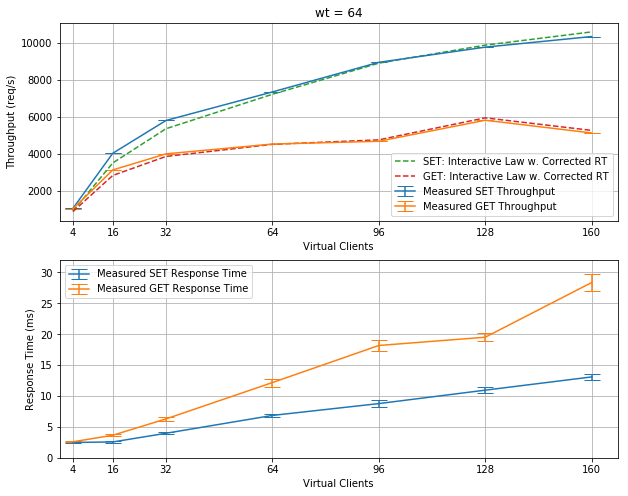

In [6]:
from itertools import cycle
#Clients = #ClientVMs * MemtierPerVM * CT * VC
N_clients = np.multiply(2*2*1,vc)
X_axis = N_clients

lines = ["-","--","-.",":"]
linecycler = cycle(lines)
# GET
figure = plt.figure(1, figsize=(10, 8))
figure.add_subplot(2,1,1)
for i in xrange(len(get_mean_tp)):
    # plot
    graph = plt.errorbar(X_axis, np.multiply(wt[i],get_mean_tp[i]), yerr=get_stddev_tp[i], capsize=8, fmt=next(linecycler) , label="wt=" + str(wt[i]))

plt.title("GET-requests")
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
#plt.ylim(0,4000)
plt.xlim(0)

figure.add_subplot(2,1,2)
for i in xrange(len(get_mean_rt)):
    # plot
    graph = plt.errorbar(X_axis, get_mean_rt[i], yerr=get_stddev_rt[i], capsize=8, fmt=next(linecycler) , label="wt=" + str(wt[i]))
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0)
plt.xlim(0)
figure.savefig(figure_path+"33_get_requests.png")

import distutils.dir_util
p = figure_path + "33_get_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
for i in xrange(len(get_mean_tp)):
    f.write("\r\ngets_tp_mean\r\n")
    f.write(str(np.multiply(wt[i],get_mean_tp[i])))
    f.write("\r\ngets_tp_std\r\n")
    f.write(str(get_stddev_tp[i]))
for i in xrange(len(get_mean_rt)):
    f.write("\r\ngets_rt_mean\r\n")
    f.write(str( get_mean_rt[i]))
    f.write("\r\ngets_tp_std\r\n")
    f.write(str(get_stddev_rt[i]))
f.close()



# SET
figure2 = plt.figure(2, figsize=(10, 8))
figure2.add_subplot(2,1,1)
for i in xrange(len(set_mean_tp)):
    # plot
    graph = plt.errorbar(X_axis, np.multiply(wt[i],set_mean_tp[i]), yerr=set_stddev_tp[i], capsize=8, fmt=next(linecycler) , label="wt=" + str(wt[i]))
plt.title("SET-requests")
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
#plt.ylim(0,4000)
plt.xlim(0)

figure2.add_subplot(2,1,2)
for i in xrange(len(set_mean_rt)):
    # plot
    graph = plt.errorbar(X_axis, set_mean_rt[i], yerr=set_stddev_rt[i], capsize=8, fmt=next(linecycler) , label="wt=" + str(wt[i]))
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0,32)
plt.xlim(0)
figure2.savefig(figure_path+"33_set_requests.png")

import distutils.dir_util
p = figure_path + "33_set_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
for i in xrange(len(set_mean_tp)):
    f.write("\r\nsets_tp_mean\r\n")
    f.write(str(np.multiply(wt[i],set_mean_tp[i])))
    f.write("\r\nsets_tp_std\r\n")
    f.write(str(set_stddev_tp[i]))
for i in xrange(len(set_mean_rt)):
    f.write("\r\nsets_rt_mean\r\n")
    f.write(str( set_mean_rt[i]))
    f.write("\r\nsets_tp_std\r\n")
    f.write(str(set_stddev_rt[i]))
f.close()


# Plot againts interactive law
figure3 = plt.figure(3, figsize=(10,12))
# wt 8 GET
figure3.add_subplot(4,2,1)
# Measured throughput
plt.errorbar(X_axis, np.multiply(get_mean_tp[0], wt[0]), yerr=set_stddev_tp[0], capsize=8 , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,get_mean_rt[0]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(get_mean_rt[0],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("GET operations, wt = 8")

# wt 8 SET
figure3.add_subplot(4,2,2)
# Measured throughput
plt.errorbar(X_axis, np.multiply(set_mean_tp[0], wt[0]), yerr=set_stddev_tp[0], capsize=8 , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,set_mean_rt[0]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(set_mean_rt[0],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("SET operations, wt = 8")

# wt 16 GET
figure3.add_subplot(4,2,3)
# Measured throughput
plt.errorbar(X_axis, np.multiply(get_mean_tp[1], wt[1]), yerr=set_stddev_tp[0], capsize=8 , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,get_mean_rt[1]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(get_mean_rt[1],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("GET operations, wt = 16")

# wt 16 SET
figure3.add_subplot(4,2,4)
# Measured throughput
plt.errorbar(X_axis, np.multiply(set_mean_tp[1], wt[1]), yerr=set_stddev_tp[0], capsize=8 , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,set_mean_rt[1]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(set_mean_rt[1],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("SET operations, wt = 16")

# wt 32 GET
figure3.add_subplot(4,2,5)
# Measured throughput
plt.errorbar(X_axis, np.multiply(get_mean_tp[2], wt[2]), yerr=set_stddev_tp[0], capsize=8, label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,get_mean_rt[2]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(get_mean_rt[2],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("GET operations, wt = 32")

# wt 32 SET
figure3.add_subplot(4,2,6)
# Measured throughput
plt.errorbar(X_axis, np.multiply(set_mean_tp[2], wt[2]), yerr=set_stddev_tp[0], capsize=8, fmt=next(linecycler) , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,set_mean_rt[2]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(set_mean_rt[2],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("SET operations, wt = 32")

# wt 64 GET
figure3.add_subplot(4,2,7)
# Measured throughput
plt.errorbar(X_axis, np.multiply(get_mean_tp[3], wt[3]), yerr=set_stddev_tp[0], capsize=8 , label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,get_mean_rt[3]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(get_mean_rt[3],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("GET operations, wt = 64")

# wt 64 SET
figure3.add_subplot(4,2,8)
# Measured throughput
plt.errorbar(X_axis, np.multiply(set_mean_tp[3], wt[3]), yerr=set_stddev_tp[0], capsize=8, label="wt=" + str(wt[0]))
# Measured RT
plt.plot(X_axis, N_clients*np.divide(1000,set_mean_rt[3]), label="Interactive Law", linestyle=':')
# Corrected RT (+2ms)
plt.plot(X_axis, N_clients*np.divide(1000,np.add(set_mean_rt[3],2)), label="Interactive Law w. Corrected RT", linestyle='--')
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.title("SET operations, wt = 64")
figure3.tight_layout()
figure3.savefig(figure_path+"33_interactive_law.png")

# Write to file
import distutils.dir_util
p = figure_path + "33_interactive_law/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
for i in xrange(len(get_mean_tp)):
    f.write("\r\nGET operations TP, wt = " + str(wt[i]) + "\r\n")
    f.write(str(np.multiply(get_mean_tp[i], wt[i])))
    f.write("\r\nGET operations TP STD, wt = " + str(wt[i]) + "\r\n")
    f.write(str(get_stddev_tp[i]))
    f.write("\r\nGET operations Corrected RT, wt = " + str(wt[i]) + "\r\n")
    f.write(str(N_clients*np.divide(1000,np.add(get_mean_rt[i],2))))
    f.write("\r\nSET operations TP, wt = " + str(wt[i]) + "\r\n")
    f.write(str(np.multiply(set_mean_tp[i], wt[i])))
    f.write("\r\nSET operations TP STD, wt = " + str(wt[i]) + "\r\n")
    f.write(str(set_stddev_tp[i]))
    f.write("\r\nSET operations Corrected RT, wt = " + str(wt[i]) + "\r\n")
    f.write(str(N_clients*np.divide(1000,np.add(set_mean_rt[i],2))))
f.close()

# Extra
figure4 = plt.figure(4, figsize=(10, 8))
figure4.add_subplot(2,1,1)

# Set throughput
graph = plt.errorbar(X_axis, np.multiply(wt[3],set_mean_tp[3]), yerr=set_stddev_tp[3], capsize=8, label="Measured SET Throughput")
graph = plt.errorbar(X_axis, np.multiply(wt[3],get_mean_tp[3]), yerr=get_stddev_tp[3], capsize=8, label="Measured GET Throughput")
print(np.max(get_mean_tp[3])*wt[3])
print(np.max(set_mean_tp[3])*wt[3])
print(get_mean_rt[3][-2])
print(set_mean_rt[3][-1])
graph = plt.plot(X_axis, N_clients*np.divide(1000,np.add(set_mean_rt[3],2)), label="SET: Interactive Law w. Corrected RT", linestyle='--')
graph = plt.plot(X_axis, N_clients*np.divide(1000,np.add(get_mean_rt[3],2)), label="GET: Interactive Law w. Corrected RT", linestyle='--')

plt.title("wt = 64")
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
#plt.ylim(0,4000)
plt.xlim(0)

figure4.add_subplot(2,1,2)

# Set response time
graph = plt.errorbar(X_axis, set_mean_rt[3], yerr=set_stddev_rt[3], capsize=8,  label="Measured SET Response Time")
graph = plt.errorbar(X_axis, get_mean_rt[3], yerr=get_stddev_rt[3], capsize=8,  label="Measured GET Response Time")
plt.setp([plt.xticks(X_axis)])
plt.legend()
plt.grid(True)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0,32)
plt.xlim(0)
figure4.savefig(figure_path+"33_max_config.png")

# Write to file
import distutils.dir_util
p = figure_path + "33_max_config/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\nGET operations TP, wt = " + str(wt[3]) + "\r\n")
f.write(str(np.multiply(wt[3],get_mean_tp[3])))
f.write("\r\nGET operations TP_STDEV, wt = " + str(wt[3]) + "\r\n")
f.write(str(get_stddev_tp[3]))
f.write("\r\nSET operations TP, wt = " + str(wt[3]) + "\r\n")
f.write(str(np.multiply(wt[3],set_mean_tp[3])))
f.write("\r\nSET operations TP_STDEV, wt = " + str(wt[3]) + "\r\n")
f.write(str(set_stddev_tp[3]))
f.write("\r\nGET operations Corrected RT, wt = " + str(wt[3]) + "\r\n")
f.write(str(N_clients*np.divide(1000,np.add(get_mean_rt[3],2))))
f.write("\r\nSET operations Corrected RT, wt = " + str(wt[3]) + "\r\n")
f.write(str(N_clients*np.divide(1000,np.add(set_mean_rt[3],2))))
f.write("\r\nGET operations RT, wt = " + str(wt[3]) + "\r\n")
f.write(str(get_mean_rt[3]))
f.write("\r\nGET operations RT_STDEV, wt = " + str(wt[3]) + "\r\n")
f.write(str(get_stddev_rt[3]))

f.write("\r\nSET operations RT, wt = " + str(wt[3]) + "\r\n")
f.write(str(set_mean_rt[3]))
f.write("\r\nSET operations RT, wt = " + str(wt[3]) + "\r\n")
f.write(str(set_stddev_rt[3]))

f.close()